# What is scikit-learn

Scikit learn provides a selection of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction via a consistence interface in Python. This library, which is largely written in Python, is built upon NumPy, SciPy and Matplotlib.

Scikit-learn includes following features:


1. Supervised Learning algorithms − Almost all the popular supervised learning algorithms, like Linear Regression, Support Vector Machine (SVM), Decision Tree etc., are the part of scikit-learn.

2. Unsupervised Learning algorithms − On the other hand, it also has all the popular unsupervised learning algorithms from clustering, factor analysis, PCA (Principal Component Analysis) to unsupervised neural networks.

3. Clustering − This model is used for grouping unlabeled data.

4. Cross Validation − It is used to check the accuracy of supervised models on unseen data.

5. Dimensionality Reduction − It is used for reducing the number of attributes in data which can be further used for summarisation, visualisation and feature selection.

6. Ensemble methods − As name suggest, it is used for combining the predictions of multiple supervised models.

7. Feature extraction − It is used to extract the features from data to define the attributes in image and text data.

8. Feature selection − It is used to identify useful attributes to create supervised models.

## Data set loading
Scikit-learn have few example datasets like <strong>iris</strong> and <strong>digits</strong> for classification and the <strong>Boston house prices</strong> for regression.

The following code shows an example of loading iris dataset:

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names
print("Feature names:", feature_names)
print("Target names:", target_names)
print("\nFirst 10 rows of X:\n", X[:10])
# As you can see, the data in the iris dataset is recorded using numpy arrays.

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']

First 10 rows of X:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


## Creating test and train sets
We can split the dataset for training and testing. The following example will split the data into 70:30 ratio

In [4]:
from sklearn.model_selection import train_test_split
train_data, test_data, trasin_label, test_label  = train_test_split(X, y , train_size=0.7, test_size=0.3)

In [5]:
print(len(X))
print(len(train_data))
print(len(test_data))

150
105
45


## Creating the model
Next, we can use our dataset to train some prediction-model. There is a wide range of Machine Learning (ML) algorithms. For example, we use KNN for classifier:

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn_classifier = KNeighborsClassifier(3)
knn_classifier.fit(train_data,trasin_label)
result = knn_classifier.predict(test_data)
accuracy = metrics.accuracy_score(test_label , result)
print("Accuracy =" , accuracy)

Accuracy = 0.9777777777777777


## Model Persistence
Once you train the model, it is desirable that the model should be persist for future use so that we do not need to retrain it again and again. It can be done with the help of dump and load features of joblib package.

In [7]:
import joblib
joblib.dump(knn_classifier, "knn_classifier.joblib")

['knn_classifier.joblib']

In [8]:
# We can load the saved model using the following method:
loaded_classifier = joblib.load("knn_classifier.joblib")
loaded_classifier

KNeighborsClassifier(n_neighbors=3)

## Preprocessing data
Scikit-learn has package named preprocessing for this purpose. The preprocessing package has the following techniques:
1. Binarisation
2. Mean removal
3. Scaling
4. Normalisation

In [9]:
# Binarisation: This preprocessing technique is used when we need to convert our numerical values into Boolean values.
from sklearn import preprocessing
data = [[2.1, -1.9, 5.5],
   [-1.5, 2.4, 3.5],
   [0.5, -7.9, 5.6],
   [5.9, 2.3, -5.8]]
preprocessing.binarize(data,threshold=0.5)

array([[1., 0., 1.],
       [0., 1., 1.],
       [0., 0., 1.],
       [1., 1., 0.]])

In [10]:
# Mean removal: This technique is used to eliminate the mean from feature vector so that every feature centered on zero.
import numpy as np
print("Mean = ", np.mean(data,axis=0))
print("Std = " , np.std(data,axis=0))

data_zero_centered = preprocessing.scale(data)

print(data_zero_centered)
print("Mean after scale = ", np.mean(data_zero_centered,axis=0))
print("Std after scale = ", np.std(data_zero_centered,axis=0))


Mean =  [ 1.75  -1.275  2.2  ]
Std =  [2.71431391 4.20022321 4.69414529]
[[ 0.12894603 -0.14880162  0.70300338]
 [-1.19735598  0.8749535   0.27694073]
 [-0.46052153 -1.57729713  0.72430651]
 [ 1.52893149  0.85114524 -1.70425062]]
Mean after scale =  [1.11022302e-16 0.00000000e+00 0.00000000e+00]
Std after scale =  [1. 1. 1.]


In [11]:
#  Scaling: We use this preprocessing technique for scaling the feature vectors.
#  Scaling of feature vectors is important, because the features should not be synthetically large or small.
min_max = preprocessing.MinMaxScaler(feature_range=(-1,1))
data_scaled = min_max.fit_transform(data_zero_centered)
print(data_scaled)

[[-0.02702703  0.16504854  0.98245614]
 [-1.          1.          0.63157895]
 [-0.45945946 -1.          1.        ]
 [ 1.          0.98058252 -1.        ]]


In [12]:
# We use this preprocessing technique for modifying the feature vectors.
# Normalisation of feature vectors is necessary so that the feature vectors can be measured at common scale

# L1 normalization: the sum of the absolute values remains always up to 1 in each row.
l1_data = preprocessing.normalize(data_scaled,"l1")
print(l1_data)
print()

# L2 normalization: the sum of the squares remains always up to 1 in each row.
l2_data = preprocessing.normalize(data_scaled,"l2")
print(l2_data)

[[-0.0230109   0.14052285  0.83646625]
 [-0.38        0.38        0.24      ]
 [-0.18681319 -0.40659341  0.40659341]
 [ 0.33550489  0.32899023 -0.33550489]]

[[-0.02711951  0.16561329  0.98581782]
 [-0.64564628  0.64564628  0.4077766 ]
 [-0.30898878 -0.67250499  0.67250499]
 [ 0.58108685  0.56980361 -0.58108685]]


## Estimator API

All machine learning algorithms in Scikit-Learn are implemented via Estimator API. The object that learns from the data (fitting the data) is an estimator. It can be used with any of the algorithms like classification, regression, clustering or even with a transformer, that extracts useful features from raw data.

Steps in using Estimator API:

Step 1: Choose a class of model
In this first step, we need to choose a class of model. It can be done by importing the appropriate Estimator class from Scikit-learn.

Step 2: Choose model hyperparameters
In this step, we need to choose class model hyperparameters. It can be done by instantiating the class with desired values.

Step 3: Arranging the data
Next, we need to arrange the data into features matrix (X) and target vector(y).

Step 4: Model Fitting
Now, we need to fit the model to your data. It can be done by calling fit() method of the model instance.

Step 5: Applying the model
After fitting the model, we can apply it to new data. For supervised learning, use predict() method to predict the labels for unknown data. While for unsupervised learning, use predict() or transform() to infer properties of the data.

# Linear Modeling with scikit-learn

A linear model is an equation that describes a relationship between two quantities that show a constant rate of change. We represent linear relationships graphically with straight lines. A linear model is usually described by two parameters: the slope, often called the growth factor or rate of change, and the y-intercept, often called the initial value. Given the slope mm and the yy-intercept b,b, the linear model can be written as a linear function y = mx + b.y=mx+b. For example, W
we can represent the position of a car moving at a constant velocity with a linear model.

The following list shows the various linear models provided by Scikit-Learn:

1. Linear Regression
2. Logistic Regression
3. Ridge Regression
4. Bayesian Ridge Regression
5. LASSO
6. Multi-task LASSO
7. Elastic-Net
8. Multi-task Elastic-Net


## Linear regression

Linear regression is a statistical model that studies the relationship between a dependent variable (Y) with a given set of independent variables (X). 
<code>sklearn.linear_model.LinearRegression</code> is the module used to implement linear regression.

In [13]:
from sklearn.linear_model import LinearRegression
X = np.array([[1,1],[1,2],[2,2],[2,3]])
print("X = " , X)
y = np.dot(X,[1,2]) + 3
print("y = " ,y)
lr = LinearRegression(fit_intercept=True,copy_X=True,n_jobs=2 )
lr.fit(X,y)

X =  [[1 1]
 [1 2]
 [2 2]
 [2 3]]
y =  [ 6  8  9 11]


LinearRegression(n_jobs=2)

In [14]:
# Altohugh it is not vwery useful, we can check the quality of the model on the training data.
lr.score(X,y)

1.0

In [15]:
# We can predict the output for any given value by using predict method:
lr.predict([[3,4]])

array([14.])

## Logistic Regression

Logistic regression is based on the linear regression, but it is useful for predicting discrete data. In other words, logistic regression is a classification algorithm rather than regression algorithm. Based on a given set of independent variables, it is used to estimate discrete value (0 or 1, yes/no, true/false).

Basically, it measures the relationship between the categorical dependent variable and one or more independent variables by estimating the probability of occurrence of an event using its logistics function.

<code>sklearn.linear_model.LogisticRegression</code> is the module used to implement logistic regression.



In [16]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names
print("feature names = ", feature_names)
print("target names = " ,target_names)

feature names =  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target names =  ['setosa' 'versicolor' 'virginica']


In [17]:
# creating training and test set
from sklearn.model_selection import train_test_split
train_data  , test_data , train_label , test_label = train_test_split(X,y, train_size=0.6 , test_size=0.4)
print("Train data :")
print(train_data[:10])

print("Train labels :")
print(train_label[:10])

print("Test data :")
print(test_data[:10])

print("Test labels :")
print(test_label[:10])


print("Train size = " , len(train_data))

print("Test size = " , len(test_data))

Train data :
[[5.7 2.8 4.1 1.3]
 [6.5 3.  5.2 2. ]
 [5.3 3.7 1.5 0.2]
 [6.5 2.8 4.6 1.5]
 [6.3 2.9 5.6 1.8]
 [6.4 3.2 5.3 2.3]
 [4.7 3.2 1.3 0.2]
 [7.  3.2 4.7 1.4]
 [5.2 2.7 3.9 1.4]
 [6.4 2.9 4.3 1.3]]
Train labels :
[1 2 0 1 2 2 0 1 1 1]
Test data :
[[4.8 3.  1.4 0.1]
 [5.9 3.  5.1 1.8]
 [5.5 2.4 3.7 1. ]
 [6.2 2.2 4.5 1.5]
 [5.5 2.3 4.  1.3]
 [5.1 3.4 1.5 0.2]
 [6.1 2.8 4.  1.3]
 [6.2 3.4 5.4 2.3]
 [4.9 3.6 1.4 0.1]
 [5.  2.  3.5 1. ]]
Test labels :
[0 2 1 1 1 0 1 2 0 1]
Train size =  90
Test size =  60


In [18]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(n_jobs=2 , max_iter=1000)
logr.fit(train_data,train_label)
logr.score(train_data, train_label)

0.9777777777777777

In [19]:
# accuracy 95% shows that logistic regression on iris dataset is quite perfect.
logr.score(test_data, test_label)

0.9833333333333333

## Ridge regression
In ridge regression we modify the loss function by adding a penalty to make a slightly worse fit. This way, we can avoid overfiting to training data and achieve better predictions on testin data.

In other words, least squared regression minimizes the sum of the squared residuals, but in ridge regression we minimize the sum of the squared residuals + alpha * slope^2. 

The predictions in ridge regression is less sensitive tio the independent variables. For alpha = 0 the ridge regression is similar to least square regression. When we increase alpha, the slope of the regression lione decreases and it makes the regression less sensitive to the input value. Therefore, we call this alpha paramter a penalty parameter. If we increase penalty parameter, our model becomes less sensitive to the training data and it prevents overfiting and bias.

<code>sklearn.linear_model.Ridge</code> is the module used to solve a regression model where loss function is the linear least squares function and regularization is L2.

In [20]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
n_samples, n_features = 15, 10
rng = np.random.RandomState(0)
y = rng.randn(n_samples)
X = rng.randn(n_samples, n_features)

lrg = LinearRegression()
rrg = Ridge(alpha=0.5)
lrg.fit(X , y)
print("Linear regression score" , lrg.score(X , y))

rrg.fit(X , y)
print("Ridge regression score" ,rrg.score(X , y))


Linear regression score 0.7949095403789805
Ridge regression score 0.7629498741931634


As you can see, the score of the linear regression is higher and it shows that the linear regression is ovderfiting while the penalty paramter in the ridge regression is preveting the overfit. Now, we test a higher value of the alpha for the same data:

In [21]:
rrg.set_params(alpha= 1)
rrg.fit(X,y)
rrg.score(X,y)

0.7248981843700946

## LASSO 
LASSO is the regularisation technique that performs L1 regularisation. It modifies the loss function by adding the penalty (shrinkage quantity) equivalent to the summation of the absolute value of coefficients.

In [27]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.5)
lasso.fit(X,y)
lasso.score(X,y)

0.136141297194326

## Polynomial features
Polynomial features are those features created by raising existing features to an exponent.

For example, if a dataset had one input feature X, then a polynomial feature would be the addition of a new feature (column) where values were calculated by squaring the values in X, e.g. X^2. This process can be repeated for each input variable in the dataset, creating a transformed version of each. The “degree” of the polynomial is used to control the number of features added, e.g. a degree of 3 will add two new variables for each input variable. Typically a small degree is used such as 2 or 3.

Generally speaking, it is unusual to use d greater than 3 or 4 because for large values of d, the polynomial curve can become overly flexible and can take on some very strange shapes. It is also common to add new variables that represent the interaction between features, e.g a new column that represents one variable multiplied by another. This too can be repeated for each input variable creating a new “interaction” variable for each pair of input variables.

A squared or cubed version of an input variable will change the probability distribution, separating the small and large values, a separation that is increased with the size of the exponent. This separation can help some machine learning algorithms make better predictions and is common for regression predictive modeling tasks and generally tasks that have numerical input variables.

Typically linear algorithms, such as linear regression and logistic regression, respond well to the use of polynomial input variables.

scikit-learn provides a module named <strong>PolynomialFeatures</strong>. This module transforms an input data matrix into a new data matrix of given degree.

In [42]:
# In this example, PolynomialFeatures is used to create polynomial features of up to power of two
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
X = np.arange(36).reshape(18,2)
print(X)
print()
poly = PolynomialFeatures(degree=2)
Xt = poly.fit_transform(X)
print(Xt)

[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]
 [12 13]
 [14 15]
 [16 17]
 [18 19]
 [20 21]
 [22 23]
 [24 25]
 [26 27]
 [28 29]
 [30 31]
 [32 33]
 [34 35]]

[[1.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 1.000e+00]
 [1.000e+00 2.000e+00 3.000e+00 4.000e+00 6.000e+00 9.000e+00]
 [1.000e+00 4.000e+00 5.000e+00 1.600e+01 2.000e+01 2.500e+01]
 [1.000e+00 6.000e+00 7.000e+00 3.600e+01 4.200e+01 4.900e+01]
 [1.000e+00 8.000e+00 9.000e+00 6.400e+01 7.200e+01 8.100e+01]
 [1.000e+00 1.000e+01 1.100e+01 1.000e+02 1.100e+02 1.210e+02]
 [1.000e+00 1.200e+01 1.300e+01 1.440e+02 1.560e+02 1.690e+02]
 [1.000e+00 1.400e+01 1.500e+01 1.960e+02 2.100e+02 2.250e+02]
 [1.000e+00 1.600e+01 1.700e+01 2.560e+02 2.720e+02 2.890e+02]
 [1.000e+00 1.800e+01 1.900e+01 3.240e+02 3.420e+02 3.610e+02]
 [1.000e+00 2.000e+01 2.100e+01 4.000e+02 4.200e+02 4.410e+02]
 [1.000e+00 2.200e+01 2.300e+01 4.840e+02 5.060e+02 5.290e+02]
 [1.000e+00 2.400e+01 2.500e+01 5.760e+02 6.000e+02 6.250e+02]
 [1.000e+00 2.600

In [45]:
# Here we create a target array with one outlier to compare the performance of the logistic regression on the original dataset and the extended dataset
y = X[:,0]*X[:,1]+100
y[-1] = 100
print(y)

[ 100  106  120  142  172  210  256  310  372  442  520  606  700  802
  912 1030 1156  100]


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import normalize

logr = LogisticRegression(max_iter=1000)
logr.fit(X,y)
print(logr.score(X,y))


logr2 = LogisticRegression(max_iter=1000)
logr2.fit(Xt,y)
print(logr2.score(Xt,y))

0.4444444444444444
0.8888888888888888


/Users/atp/Work/git/AI/scikit-learn/.sklearn/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## SGD optimization

The name Stochastic Gradient Descent - Classifier (SGD-Classifier) might mislead some user to think that SGD is a classifier. But that’s not the case! SGD Classifier is a linear classifier (SVM, logistic regression, a.o.) optimized by the SGD. These are two different concepts. While SGD is a optimization method, Logistic Regression or linear Support Vector Machine is a machine learning algorithm/model. You can think of that a machine learning model defines a loss function, and the optimization method minimizes/maximizes it.

In a nutshell gradient descent is used to minimize a cost function. Gradient descent is one of the most popular algorithms to perform optimization and by far the most common way to optimize neural networks. But we can also use these kinds of algorithms to optimize our linear classifier such as Logistic Regression and linear Support Vecotor Machines.


Scikit-learn provides <code>SGDClassifier</code> module to implement SGD classification.

In the following example we use SGDClassifier with logistic regression to train a model on iris dataset

In [50]:
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()

In [57]:
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
X = breast_cancer.data
y = breast_cancer.target
print(breast_cancer.target_names)
print()
X_centered  = scale(X)
print(X[0])
print()
print(X_centered[0])
print()
X_scaled = MinMaxScaler().fit_transform(X_centered)
print(X_scaled)


['malignant' 'benign']

[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]

[ 1.09706398 -2.07333501  1.26993369  0.9843749   1.56846633  3.28351467
  2.65287398  2.53247522  2.21751501  2.25574689  2.48973393 -0.56526506
  2.83303087  2.48757756 -0.21400165  1.31686157  0.72402616  0.66081994
  1.14875667  0.90708308  1.88668963 -1.35929347  2.30360062  2.00123749
  1.30768627  2.61666502  2.10952635  2.29607613  2.75062224  1.93701461]

[[0.52103744 0.0226581  0.54598853 ... 0.91202749 0.59846245 0.41886396]
 [0.64314449 0.27257355 0.61578329 ... 0.63917526 0.23358959 0.22287813]
 [0.60149557 0.3902604  0.59574321 ... 0.83505155 0.40370589 0.21343303]
 ...
 [0.45525108 0.62123774 0.44578813 ... 0.48728522 0.12872068 0.1519087 ]
 [0.6

In [59]:
from sklearn.linear_model import SGDClassifier
sgd_classifier = SGDClassifier(loss="log_loss")
sgd_classifier.fit(X_scaled,y)
sgd_classifier.score(X_scaled,y)

0.9824253075571178

In [60]:
from sklearn.linear_model import LogisticRegression
linear_classifier = LogisticRegression()
linear_classifier.fit(X_scaled , y)
linear_classifier.score(X_scaled , y)

0.9718804920913884

# Support vector machine

A support vector machine (SVM) is a type of deep learning algorithm that performs supervised learning for classification or regression of data groups. It draws lines (hyperplanes) to separate the groups according to patterns.

Like other supervised learning machines, an SVM requires labeled data to be trained. Groups of materials are labeled for classification. Training materials for SVMs are classified separately in different points in space and organized into clearly separated groups. 

According to the SVM algorithm we find the points closest to the line from both the classes. These points are called support vectors. Now, we compute the distance between the line and the support vectors. This distance is called the margin. Our goal is to maximize the margin. The hyperplane for which the margin is maximum is the optimal hyperplane.


There are two imporant parameters that you can pass to change the way this hyperplane is created:

<h4>C:</h4>
It controls the trade off between smooth decision boundary and classifying training points correctly. A large value of c means you will get more training points correctly.


<strong>Smooth decision boundary vs classifying all points correctly</strong>

Consider an example as shown in the figure above. There are a number of decision boundaries that we can draw for this dataset. Consider a straight (green colored) decision boundary which is quite simple but it comes at the cost of a few points being misclassified. These misclassified points are called outliers. We can also make something that is considerably more wiggly(sky blue colored decision boundary) but where we get potentially all of the training points correct. Of course the trade off having something that is very intricate, very complicated like this is that chances are it is not going to generalize quite as well to our test set. So something that is simple, more straight maybe actually the better choice if you look at the accuracy. Large value of c means you will get more intricate decision curves trying to fit in all the points. Figuring out how much you want to have a smooth decision boundary vs one that gets things correct is part of artistry of machine learning. So try different values of c for your dataset to get the perfectly balanced curve and avoid over fitting.

<h4>Gamma:</h4>

It defines how far the influence of a single training example reaches. If it has a low value it means that every point has a far reach and conversely high value of gamma means that every point has close reach.

If gamma has a very high value, then the decision boundary is just going to be dependent upon the points that are very close to the line which effectively results in ignoring some of the points that are very far from the decision boundary. This is because the closer points get more weight and it results in a wiggly curve as shown in previous graph.On the other hand, if the gamma value is low even the far away points get considerable weight and we get a more linear curve.



In [61]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X,y)
svc.score(X,y)

0.9226713532513181

In [64]:
svc = SVC(C=2)
svc.fit(X,y)
svc.score(X,y)

# Larger value of C results in a larger score on training data

0.9279437609841827

# Anomaly detection

Anomaly detection is one of the most common use cases of machine learning. Generally speaking, an anomaly is something that differs from a norm: a deviation, an exception.

There are different type of anomalies:

Now let’s see what kinds of anomalies or outliers machine learning engineers usually have to face.

1. Global outliers
When a data point assumes a value that is far outside all the other data point value ranges in the dataset, it can be considered a global anomaly. In other words, it’s a rare event. For example, if you receive an average American salary to your bank accounts each month but one day get a million dollars, that would look like a global anomaly to the bank’s analytics team.

2. Contextual outliers
When an outlier is called contextual it means that its value doesn’t correspond with what we expect to observe for a similar data point in the same context. Contexts are usually temporal, and the same situation observed at different times can be not an outlier. For example, for stores it’s quite normal to experience an increase in customers during the holiday season. However, if a sudden boost happens outside of holidays or sales, it can be considered a contextual outlier.

3. Collective outliers
Collective outliers are represented by a subset of data points that deviate from the normal behavior. In general, tech companies tend to grow bigger and bigger. Some companies may decay but it’s not a general trend. However, if many companies at once show a decrease in revenue in the same period of time, we can identify a collective outlier.

## Outlier detection using Elliptical Envelope

<img src="./images/elliptic.png" width="400" />

Elliptical Envelope creates an imaginary elliptical area around a given dataset. Values that fall inside the envelope are considered normal data and anything outside the envelope is returned as outliers. So, naturally, the red data points in the above diagram should be identified as outliers by this algorithm. As evident from this figure, the algorithm works best if data has a Gaussian distribution.

[[ -4.89113486   0.12525452]
 [  1.78377705   3.08078814]
 [  2.38239307   0.58366144]
 [  1.23202448  -6.84017949]
 [ -0.17687348  -4.94313588]
 [ -4.01089115  -1.06162334]
 [ -0.58697058  -4.37487683]
 [ -2.61499085   1.49037116]
 [  1.21600965  -0.54101647]
 [ -5.98626993  -0.70928507]
 [  3.23356224  -0.12803287]
 [ -6.6361923    1.59644045]
 [ -3.43893247   8.62564066]
 [  0.30304533   1.52464328]
 [  0.38206085  -0.37426621]
 [  0.91752293   5.34227207]
 [  1.01075852   1.15382739]
 [ -0.67995003  -5.96130476]
 [ -3.1131058    5.27909966]
 [  6.09654775  -6.49947791]
 [  0.83588302   9.03132906]
 [ -1.94399328  -5.50172492]
 [ -4.42709914  -2.69357127]
 [  2.6925868    3.76943987]
 [  5.75967567  -2.22185451]
 [ -1.22016419  -0.18821789]
 [  0.59451692   1.21143621]
 [  1.71067184  -3.32502548]
 [  2.15506976  -1.83088778]
 [ -0.62389741   2.9865708 ]
 [ -5.50700929  -2.9907178 ]
 [  6.09176348   1.01707529]
 [  3.78327112  -0.39810055]
 [  3.30369281  -2.69323381]
 [  1.53372807

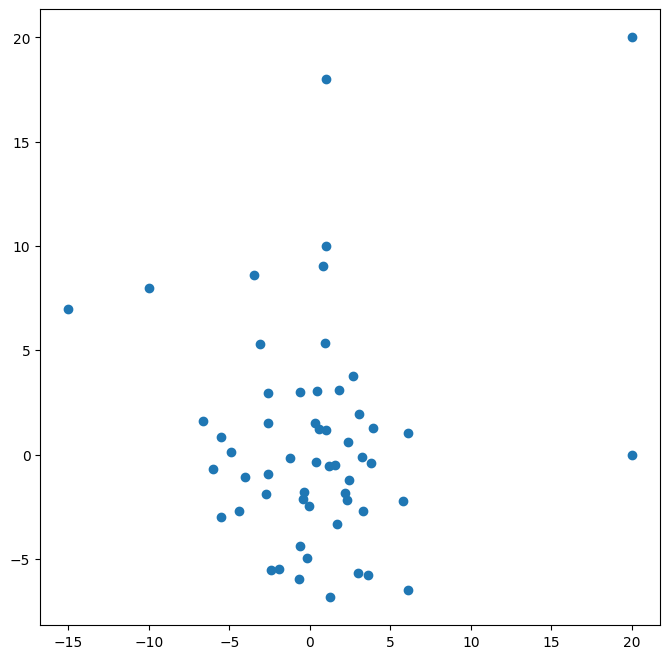

In [33]:
# using sklearn for anomaly detection
import numpy as np
import matplotlib.pyplot as plt
outliers = np.array([[1,10],[1,18],[20,0],[-10,8],[-15,7],[20,20]])
data = np.random.normal(0,3,(50,2))
data = np.append(data,outliers,axis=0)
print(data)
fig, axis = plt.subplots(figsize=(8,8))
axis.scatter(data[:,0],data[:,1])

In [36]:
from sklearn.covariance import EllipticEnvelope
ee = EllipticEnvelope()
ee.fit(data)
print(ee.predict([[20,10]]))
print(ee.predict([[5,3]]))
print(ee.predict([[0,0]]))
print(ee.predict([[11,2]]))
print(ee.predict([[-6,4]]))

[-1]
[1]
[1]
[-1]
[1]


## Isolcation forest 
In case of high-dimensional dataset, one efficient way for outlier detection is to use random forests. Isolation Forests(IF), similar to Random Forests, are build based on decision trees. And since there are no pre-defined labels here, it is an unsupervised model.

Isolation Forests were built based on the fact that anomalies are the data points that are “few and different”. In an Isolation Forest, randomly sub-sampled data is processed in a tree structure based on randomly selected features. The samples that travel deeper into the tree are less likely to be anomalies as they required more cuts to isolate them. Similarly, the samples which end up in shorter branches indicate anomalies as it was easier for the tree to separate them from other observations.

In sklearn <code>sklearn.ensemble.IsolationForest</code> can be used for anomaly detection.

In [38]:
from sklearn.ensemble import IsolationForest
iF = IsolationForest()
iF.fit(data)
print(iF.predict([[20,10]]))
print(iF.predict([[5,3]]))
print(iF.predict([[0,0]]))
print(iF.predict([[11,2]]))
print(iF.predict([[-6,4]]))

[-1]
[1]
[1]
[-1]
[1]


## Local Outlier Factor (LOF)

Local Outlier Factor (LOF) algorithm is another efficient algorithm to perform outlier detection on high dimension data.  The scikit-learn provides <code>neighbors.LocalOutlierFactor</code> method that computes a score, called local outlier factor, reflecting the degree of anomality of the observations. The main logic of this algorithm is to detect the samples that have a substantially lower density than its neighbors. Thats why it measures the local density deviation of given data points w.r.t. their neighbors.

In [40]:
from sklearn.neighbors import LocalOutlierFactor
lo = LocalOutlierFactor(novelty=True)
lo.fit(data)
print(lo.predict([[20,10]]))
print(lo.predict([[5,3]]))
print(lo.predict([[0,0]]))
print(lo.predict([[11,2]]))
print(lo.predict([[-6,4]]))

[-1]
[1]
[1]
[-1]
[1]
